In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

### By subjects but all

In [30]:
behavior_compare = fb.create_all_subs_together()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.table_allsubs_together(subject_id, behavior_before, behavior_after, behavior_compare, verbose=False)

show_compare = behavior_compare.loc[behavior_compare['Real stimulation'] == 0]
styled = show_compare.style.bar(subset=['RT mean before', 'RT mean after',
                                             'RT median before', 'RT median after', 'RT mean shorten %', 'RT median shorten %'], align='mid', color= '#1338BE')
display(styled)

show_compare = behavior_compare.loc[behavior_compare['Real stimulation'] == 1]
styled = show_compare.style.bar(subset=['RT mean before', 'RT mean after',
                                             'RT median before', 'RT median after', 'RT mean shorten %', 'RT median shorten %'], align='mid', color= '#d65f5f')
display(styled)


,subject id,Real stimulation,RT mean before,RT mean after,RT median before,RT median after,RT mean shorten %,RT median shorten %
1,2,0,361.837500,314.100598,348.360000,307.640000,13.192912,11.689057
5,6,0,286.577311,303.839916,268.330000,292.230000,-6.023717,-8.906943
6,7,0,300.601513,283.992101,281.880000,260.700000,5.525392,7.513836
7,8,0,279.746807,235.567179,265.570000,221.360000,15.792719,16.647212
9,10,0,276.444867,261.213220,261.250000,250.275000,5.509832,4.200957
10,11,0,288.828898,246.536983,260.705000,240.855000,14.642550,7.613970
13,14,0,376.162373,321.599500,355.780000,305.225000,14.505138,14.209624
14,15,0,399.210833,390.303103,385.360000,363.225000,2.231335,5.743980
15,16,0,314.536833,292.431667,303.660000,280.275000,7.027847,7.701047


,subject id,Real stimulation,RT mean before,RT mean after,RT median before,RT median after,RT mean shorten %,RT median shorten %
0,1,1,231.848908,192.074914,213.400000,184.795000,17.155135,13.404405
2,3,1,265.423529,220.153017,241.900000,206.715000,17.055953,14.545267
3,4,1,297.465268,321.429519,243.500000,260.265000,-8.056151,-6.885010
4,5,1,329.741776,256.870708,307.930000,248.830000,22.099434,19.192674
8,9,1,358.072353,325.204583,339.520000,304.665000,9.179086,10.265964
11,12,1,267.378151,314.006583,247.850000,289.710000,-17.439133,-16.889248
12,13,1,271.824333,298.238667,257.595000,288.520000,-9.717428,-12.005280
16,17,1,406.156356,386.313750,393.515000,365.335000,4.885460,7.161099
17,18,1,326.744622,314.336303,314.330000,284.820000,3.797559,9.388223


In [31]:
real_ids = [1, 3, 4, 5, 9, 12, 13, 17, 18]
sham_ids = [2, 6, 7, 8, 10, 11, 14, 15, 16]
behavior_compare = behavior_compare.loc[behavior_compare['subject id'].isin(real_ids+sham_ids)]

rt_sham_before = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, 'RT mean before'].tolist()
rt_sham_after = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, 'RT mean after'].tolist()
rt_real_before = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, 'RT mean before'].tolist()
rt_real_after = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, 'RT mean after'].tolist()

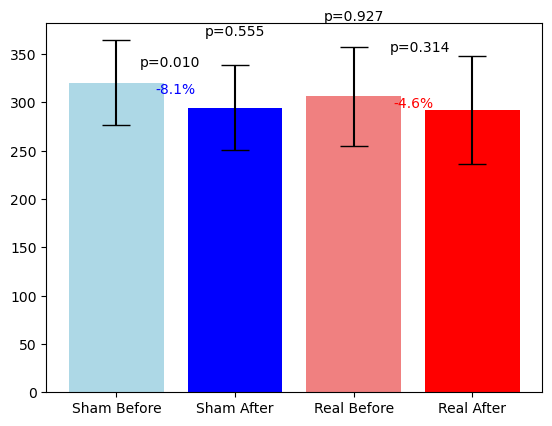

In [32]:
# 1. Calculate means and standard deviations
mean_sham_before = np.mean(rt_sham_before)
std_sham_before = np.std(rt_sham_before)
mean_sham_after = np.mean(rt_sham_after)
std_sham_after = np.std(rt_sham_after)
mean_real_before = np.mean(rt_real_before)
std_real_before = np.std(rt_real_before)
mean_real_after = np.mean(rt_real_after)
std_real_after = np.std(rt_real_after)

# 2. Plotting
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
means = [mean_sham_before, mean_sham_after, mean_real_before, mean_real_after]
std_devs = [std_sham_before, std_sham_after, std_real_before, std_real_after]
colors = ['lightblue', 'blue', 'lightcoral', 'red']

fig, ax = plt.subplots()

bars = ax.bar(labels, means, yerr=std_devs, color=colors, capsize=10)

# 3. Statistical tests and annotations
# Calculate p-values
_, p_sham = ttest_rel(rt_sham_before, rt_sham_after)
_, p_real = ttest_rel(rt_real_before, rt_real_after)
_, p_before = ttest_ind(rt_sham_before, rt_real_before)
_, p_after = ttest_ind(rt_sham_after, rt_real_after)

# Calculate percentage changes
percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

# Annotate the p-values
heights = [bar.get_height() for bar in bars]
max_height = max(heights)

# Adjusting the positions for annotations based on your bar heights
position_adjustments = [0.05, 0.10, 0.15, 0.20]  # You might need to tweak these values

ax.text(0.2, max_height + position_adjustments[0]*max_height, f'p={p_sham:.3f}')
ax.text(2.3, max_height + position_adjustments[1]*max_height, f'p={p_real:.3f}')
ax.text(1, max_height + position_adjustments[2]*max_height, f'p={p_before:.3f}', ha='center')
ax.text(2, max_height + position_adjustments[3]*max_height, f'p={p_after:.3f}', ha='center')

# Add percentage changes
ax.text(0.5, heights[0], f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue')
ax.text(2.5, heights[2], f'{percent_change_real:.1f}%', ha='center', va='top', color='red')

plt.show()


## By trials

In [33]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)
display(behavior_compare)

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,2,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,3,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,4,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,5,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...,...
4315,18,116,1,after,1,-1,1,1.0,-1,1,0.24539
4316,18,117,1,after,1,1,1,1.0,1,1,0.21152
4317,18,118,1,after,2,1,-1,1.0,-1,1,0.32075
4318,18,119,1,after,2,-1,-1,0.5,1,1,0.46414


In [34]:
case = 'endo invalid'
behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & (behavior_compare['reaction time'] > 0.05) & (behavior_compare['reaction time'] < 1)]
behavior_before, behavior_after = fb.filter_behav(case, behavior_compare.loc[behavior_compare['session'] == 'before'], 
                                                  behavior_compare.loc[behavior_compare['session'] == 'after'])

behavior_compare = pd.concat([behavior_before, behavior_after])
rt_sham_before = behavior_before.loc[behavior_compare['Real stimulation'] == 0]
rt_sham_after = behavior_after.loc[behavior_compare['Real stimulation'] == 0 ]
rt_real_before = behavior_before.loc[behavior_compare['Real stimulation'] == 1]
rt_real_after = behavior_after.loc[behavior_compare['Real stimulation'] == 1]

# preprocessing
k_out = [1, 0.9, 1, 0.9]
rt_sham_before = fb.remove_outlier(rt_sham_before, k=k_out[0], left=False, right=True, verbose=True)
rt_sham_after = fb.remove_outlier(rt_sham_after, k=k_out[1], left=True, right=False, verbose=True)
rt_real_before = fb.remove_outlier(rt_real_before, k=k_out[2], left=True, right=False, verbose=True)
rt_real_after = fb.remove_outlier(rt_real_after, k=k_out[3], left=False, right=True, verbose=True)

rt_sham_before

Removed outliers: 103-94=9
Removed outliers: 102-101=1
Removed outliers: 104-104=0
Removed outliers: 96-91=5


,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
257,2,18,0,before,1,-1,-1,0.5,1,1,0.45601
286,2,47,0,before,1,-1,-1,0.5,1,1,0.43045
308,2,69,0,before,1,1,-1,1.0,-1,1,0.50563
312,2,73,0,before,1,1,-1,0.5,-1,1,0.31813
327,2,88,0,before,1,1,-1,0.5,-1,1,0.54693
...,...,...,...,...,...,...,...,...,...,...,...
3649,16,50,0,before,1,-1,-1,1.0,1,1,0.51303
3652,16,53,0,before,1,-1,-1,0.5,1,1,0.37896
3654,16,55,0,before,1,1,-1,0.5,-1,1,0.42545
3679,16,80,0,before,1,-1,-1,1.0,1,1,0.32796


In [35]:
rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()
rt_sham_before = [num * 1000 for num in rt_sham_before]
rt_sham_after = [num * 1000 for num in rt_sham_after]
rt_real_before = [num * 1000 for num in rt_real_before]
rt_real_after = [num * 1000 for num in rt_real_after]

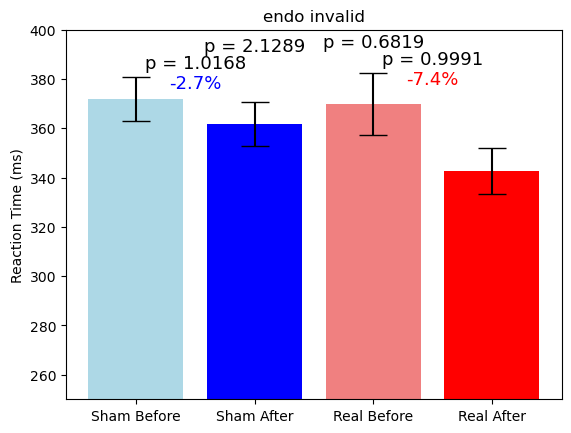

In [36]:
# Calculate means
means = [np.mean(rt_sham_before), np.mean(rt_sham_after), np.mean(rt_real_before), np.mean(rt_real_after)]

# Calculate standard errors
std_errors = [
    np.std(rt_sham_before) / np.sqrt(len(rt_sham_before)), np.std(rt_sham_after) / np.sqrt(len(rt_sham_after)),
    np.std(rt_real_before) / np.sqrt(len(rt_real_before)), np.std(rt_real_after) / np.sqrt(len(rt_real_after))
]

# Calculate t-tests
_, p_sham = mannwhitneyu(rt_sham_before, rt_sham_after)
_, p_real = mannwhitneyu(rt_real_before, rt_real_after)
_, p_before = mannwhitneyu(rt_sham_before, rt_real_before)
_, p_after = mannwhitneyu(rt_sham_after, rt_real_after)


# Calculate percentage changes
percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

# Bar chart
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

fig, ax = plt.subplots()

bars = ax.bar(labels, means, yerr=std_errors, color=colors, capsize=10)

# Add p-values
heights = [bar.get_height() + error for bar, error in zip(bars, std_errors)]
fsize = 13
ax.text(0.5, heights[0] + 2, f'p = {p_sham*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(2.5, heights[2] + 2, f'p = {p_real*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(1, heights[0] + 9, f'p = {p_before*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(2, heights[2] + 9, f'p = {p_after*4:.4f}', ha='center', va='bottom', fontsize=fsize)

# Add percentage changes
ax.text(0.5, heights[0] + 1, f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue', fontsize=fsize)
ax.text(2.5, heights[2] + 1, f'{percent_change_real:.1f}%', ha='center', va='top', color='red', fontsize=fsize)

# Add some additional formatting if desired
ax.set_ylabel('Reaction Time (ms)')
ax.set_title(case)
ax.set_ylim([250, 400])  # Adjust as needed

plt.show()

In [37]:
def plot_compare(case):
    behavior_compare, experiment = fb.create_allsubs_compare()
    for subject_id in range (1,19):
        behavior_before, behavior_after = fb.load_behavior(subject_id)
        behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)

    behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & 
                                            (behavior_compare['reaction time'] > 0.05) & (behavior_compare['reaction time'] < 1)]
    behavior_before, behavior_after = fb.filter_behav(case, behavior_compare.loc[behavior_compare['session'] == 'before'], 
                                                    behavior_compare.loc[behavior_compare['session'] == 'after'])

    behavior_compare = pd.concat([behavior_before, behavior_after])
    rt_sham_before = behavior_before.loc[behavior_compare['Real stimulation'] == 0]
    rt_sham_after = behavior_after.loc[behavior_compare['Real stimulation'] == 0 ]
    rt_real_before = behavior_before.loc[behavior_compare['Real stimulation'] == 1]
    rt_real_after = behavior_after.loc[behavior_compare['Real stimulation'] == 1]

    # preprocessing
    k_out = [1, 0.9, 1, 0.9]
    rt_sham_before = fb.remove_outlier(rt_sham_before, k=k_out[0], left=False, right=True, verbose=True)
    rt_sham_after = fb.remove_outlier(rt_sham_after, k=k_out[1], left=True, right=False, verbose=True)
    rt_real_before = fb.remove_outlier(rt_real_before, k=k_out[2], left=True, right=False, verbose=True)
    rt_real_after = fb.remove_outlier(rt_real_after, k=k_out[3], left=False, right=True, verbose=True)

    rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
    rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
    rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
    rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()
    rt_sham_before = [num * 1000 for num in rt_sham_before]
    rt_sham_after = [num * 1000 for num in rt_sham_after]
    rt_real_before = [num * 1000 for num in rt_real_before]
    rt_real_after = [num * 1000 for num in rt_real_after]

    
    # Calculate means
    means = [np.mean(rt_sham_before), np.mean(rt_sham_after), np.mean(rt_real_before), np.mean(rt_real_after)]

    # Calculate standard errors
    std_errors = [
        np.std(rt_sham_before) / np.sqrt(len(rt_sham_before)), np.std(rt_sham_after) / np.sqrt(len(rt_sham_after)),
        np.std(rt_real_before) / np.sqrt(len(rt_real_before)), np.std(rt_real_after) / np.sqrt(len(rt_real_after))
    ]

    # Calculate t-tests
    _, p_sham = mannwhitneyu(rt_sham_before, rt_sham_after)
    _, p_real = mannwhitneyu(rt_real_before, rt_real_after)
    _, p_before = mannwhitneyu(rt_sham_before, rt_real_before)
    _, p_after = mannwhitneyu(rt_sham_after, rt_real_after)


    # Calculate percentage changes
    percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
    percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

    # Bar chart
    labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
    colors = ['lightblue', 'blue', 'lightcoral', 'red']

    fig, ax = plt.subplots()

    bars = ax.bar(labels, means, yerr=std_errors, color=colors, capsize=10)

    # Add p-values
    heights = [bar.get_height() + error for bar, error in zip(bars, std_errors)]
    fsize = 13
    ax.text(0.5, heights[0] + 2, f'p = {p_sham*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(2.5, heights[2] + 2, f'p = {p_real*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(1, heights[0] + 8, f'p = {p_before*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(2, heights[2] + 8, f'p = {p_after*4:.4f}', ha='center', va='bottom', fontsize=fsize)

    # Add percentage changes
    ax.text(0.5, heights[0] + 1, f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue', fontsize=fsize)
    ax.text(2.5, heights[2] + 1, f'{percent_change_real:.1f}%', ha='center', va='top', color='red', fontsize=fsize)

    # Add some additional formatting if desired
    ax.set_ylabel('Reaction Time (ms)')
    ax.set_title(case)
    ax.set_ylim([250, 400])  # Adjust as needed

    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', case +'.png')
    plt.savefig(save_path, format='png')

### save figures for all cases

In [38]:
case_list = ['all', 'endo', 'exo', 'valid', 'endo valid', 'exo valid', 'invalid', 'endo invalid', 'exo invalid', 'stim left', 'endo stim left', 'endo stim right', 'stim right', 'exo stim left', 'exo stim right', 'cue left', 'endo cue left', 'exo cue left', 'cue right', 'endo cue right', 'exo cue right']
# for case in case_list:
#     print("Plotting " + case + "...")
#     isTrue = plot_compare(case)

## Distribution (not in use)

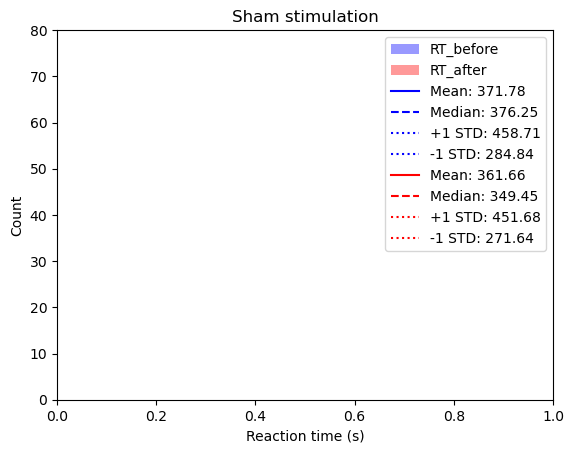

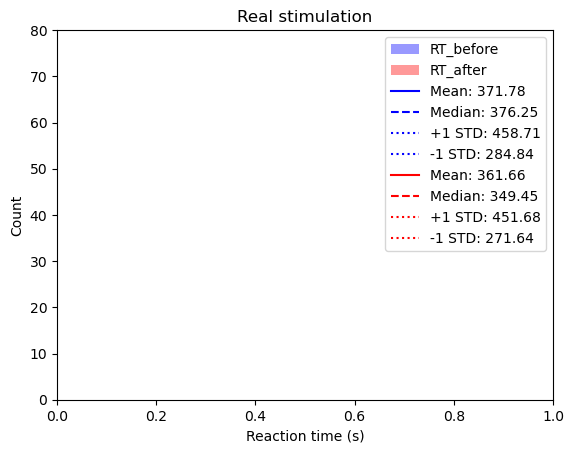

In [39]:
bin_size = 50
xmax = 1
ymax = 80
bin_edges = np.linspace(0, xmax, bin_size+1)

mu_before, median_before, sigma_before = np.mean(rt_sham_before), np.median(rt_sham_before), np.std(rt_sham_before)
mu_after, median_after, sigma_after = np.mean(rt_sham_after), np.median(rt_sham_after), np.std(rt_sham_after)

fig, ax = plt.subplots()

ax.hist(rt_sham_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_sham_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Sham stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(rt_real_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_real_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Real stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

### Behavior by time

In [40]:
behavior_compare

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
2,1,3,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,4,1,before,1,-1,-1,0.5,1,1,0.22220
18,1,19,1,before,1,-1,-1,0.5,1,1,0.20330
40,1,41,1,before,1,1,-1,0.5,-1,1,0.50352
43,1,44,1,before,1,1,-1,0.5,-1,1,0.36744
...,...,...,...,...,...,...,...,...,...,...,...
4261,18,62,1,after,1,1,-1,0.5,-1,1,0.34816
4263,18,64,1,after,1,1,-1,0.5,-1,1,0.33802
4264,18,65,1,after,1,1,-1,1.0,-1,1,0.28212
4288,18,89,1,after,1,-1,-1,0.5,1,1,0.41277


In [41]:
all_real = [1, 3, 4, 5, 9, 12, 13, 17, 18]
all_sham = [2, 6, 7, 8, 10, 11, 14, 15, 16]

behav_over_sham_before = np.ndarray(shape=(9, 120))
behav_over_sham_after = np.ndarray(shape=(9, 120))
behav_over_real_before = np.ndarray(shape=(9, 120))
behav_over_real_after = np.ndarray(shape=(9, 120))

real_id = 0
sham_id = 0

for sub in all_real:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_real_before[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_real_after[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    real_id += 1

for sub in all_sham:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_sham_before[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_sham_after[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    sham_id += 1

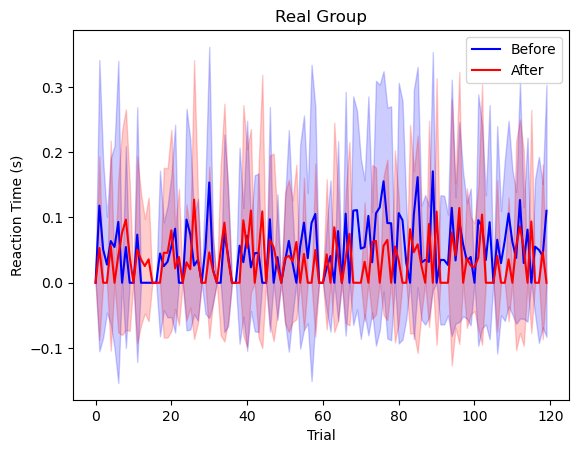

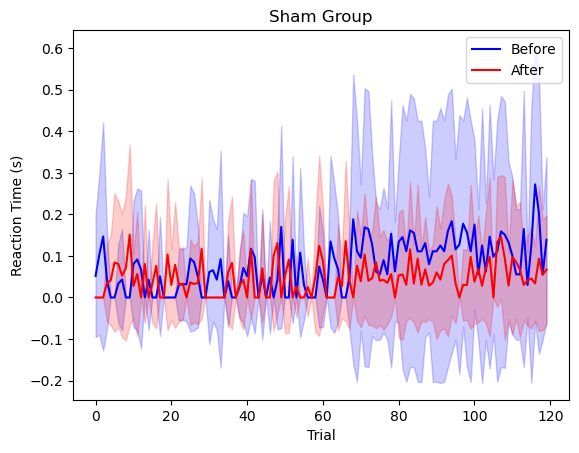

In [42]:
def plot_line_chart(data_before, data_after, title):
    # Calculate the mean and standard deviation, ignoring uninitialized values
    mean_before = np.nanmean(data_before, axis=0)
    std_before = np.nanstd(data_before, axis=0)
    mean_after = np.nanmean(data_after, axis=0)
    std_after = np.nanstd(data_after, axis=0)

    # Plot mean lines
    plt.plot(mean_before, color='blue', label='Before')
    plt.plot(mean_after, color='red', label='After')

    # Plot shaded areas for standard deviation
    plt.fill_between(range(len(mean_before)), mean_before - std_before, mean_before + std_before, color='blue', alpha=0.2)
    plt.fill_between(range(len(mean_after)), mean_after - std_after, mean_after + std_after, color='red', alpha=0.2)

    plt.title(title)
    plt.xlabel('Trial')
    plt.ylabel('Reaction Time (s)')
    plt.legend()
    plt.show()

# Replace uninitialized values with NaN to ignore them in mean and std calculations
behav_over_real_before[behav_over_real_before == 0] = np.nan
behav_over_real_after[behav_over_real_after == 0] = np.nan
behav_over_sham_before[behav_over_sham_before == 0] = np.nan
behav_over_sham_after[behav_over_sham_after == 0] = np.nan

# Plot the charts
plot_line_chart(behav_over_real_before, behav_over_real_after, 'Real Group')
plot_line_chart(behav_over_sham_before, behav_over_sham_after, 'Sham Group')
